In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

In [18]:
class NegativeBinomialDistribution:
    def __init__(self, r, p):
        self.r = r
        self.p = p

    def pmf(self, x):
        coef = np.math.comb(x + self.r - 1, x)
        return coef * (self.p**self.r) * ((1 - self.p)**x)

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, x):
        return sum(self.pmf(k) for k in range(x + 1))

def plot_pmf(x_values, pmf1, pmf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf1, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf2, basefmt=" ", linefmt="red", markerfmt="ro", label=label2)
    plt.title(title)
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.step(x_values, cdf1, where="mid", label=label1, color='blue')
    plt.step(x_values, cdf2, where="mid", label=label2, color='red')
    plt.title(title)
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pmf_scipy, pmf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf_scipy, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf_custom, basefmt=" ", linefmt="orange", markerfmt="go", label=label2)
    plt.title(title)
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
# Parameters for two negative binomial distributions
r1, p1 = 5, 0.5
r2, p2 = 3, 0.7

# Generate x values (number of trials required for r successes)
x_negbinom_1 = np.arange(r1, r1 + 30)
x_negbinom_2 = np.arange(r2, r2 + 30)

# Calculate PMF and CDF using scipy
pmf_negbinom_1_scipy = nbinom.pmf(x_negbinom_1 - r1, r1, p1)
pmf_negbinom_2_scipy = nbinom.pmf(x_negbinom_2 - r2, r2, p2)
cdf_negbinom_1_scipy = nbinom.cdf(x_negbinom_1 - r1, r1, p1)
cdf_negbinom_2_scipy = nbinom.cdf(x_negbinom_2 - r2, r2, p2)

# Create instances of NegativeBinomialDistribution
neg_binom_1 = NegativeBinomialDistribution(r1, p1)
neg_binom_2 = NegativeBinomialDistribution(r2, p2)

# Calculate PMF and CDF using custom class
pmf_negbinom_1_custom = np.array([neg_binom_1.pmf(x - r1) for x in x_negbinom_1])
pmf_negbinom_2_custom = np.array([neg_binom_2.pmf(x - r2) for x in x_negbinom_2])

cdf_negbinom_1_custom = neg_binom_1.cdf(x_negbinom_1 - r1)
cdf_negbinom_2_custom = neg_binom_2.cdf(x_negbinom_2 - r2)

/tmp/ipykernel_1279662/4041397543.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef = np.math.comb(x + self.r - 1, x)


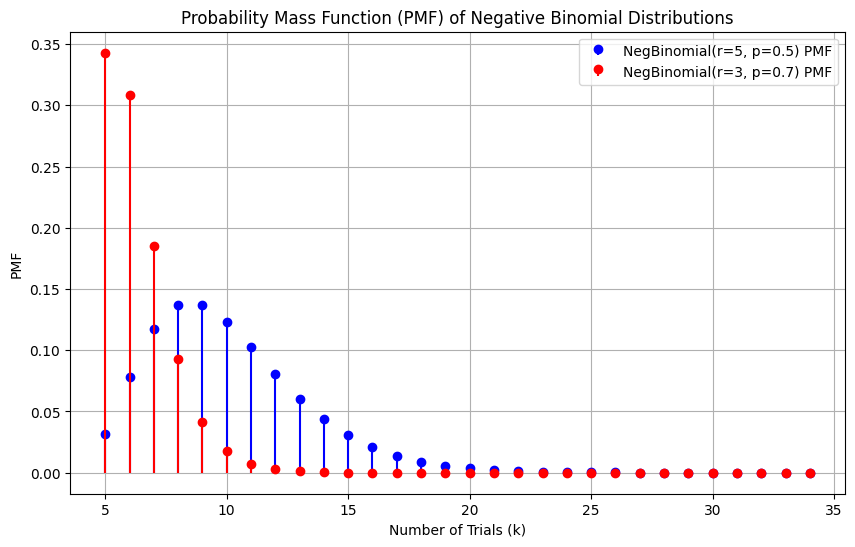

In [20]:
# Plot 1: PMF of Negative Binomial Distributions (Original)
plot_pmf(x_negbinom_1, pmf_negbinom_1_scipy, pmf_negbinom_2_scipy,
         label1=f'NegBinomial(r={r1}, p={p1}) PMF', 
         label2=f'NegBinomial(r={r2}, p={p2}) PMF',
         title='Probability Mass Function (PMF) of Negative Binomial Distributions')

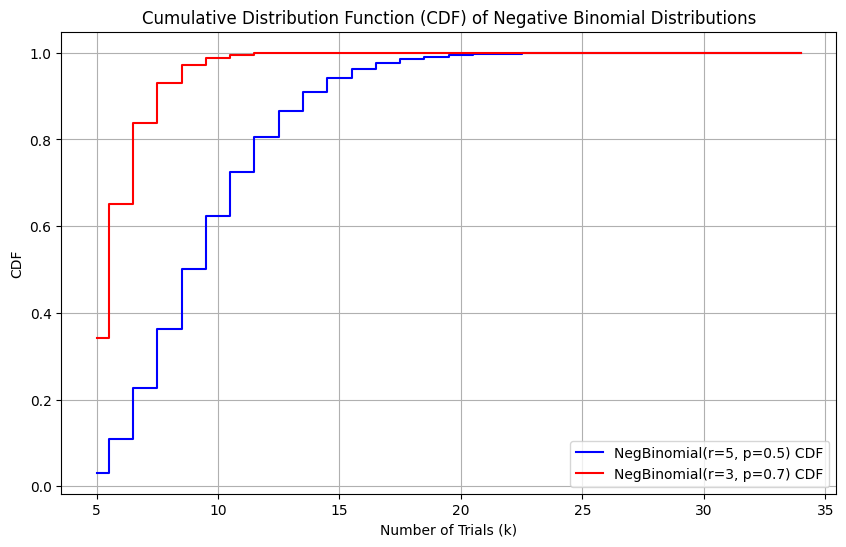

In [21]:
# Plot 2: CDF of Negative Binomial Distributions (Original)
plot_cdf(x_negbinom_1, cdf_negbinom_1_scipy, cdf_negbinom_2_scipy, 
         label1=f'NegBinomial(r={r1}, p={p1}) CDF', 
         label2=f'NegBinomial(r={r2}, p={p2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Negative Binomial Distributions')

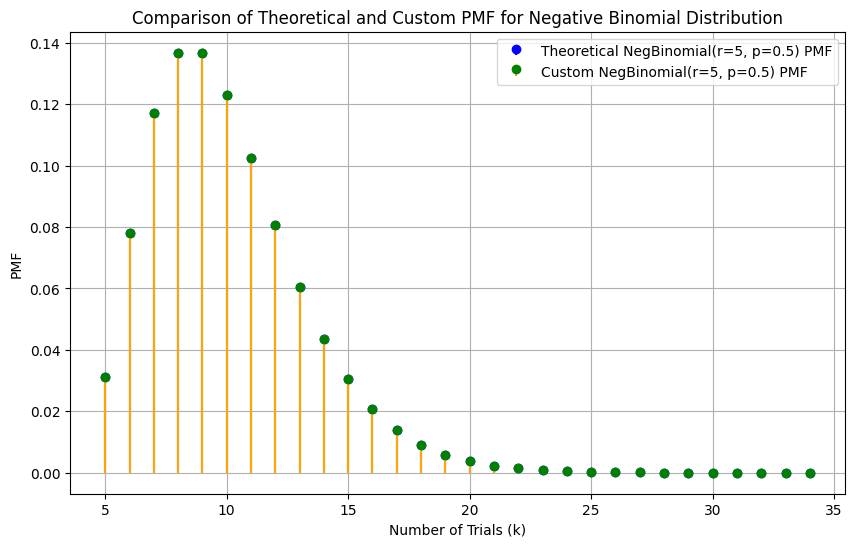

In [22]:
# Plot 3: Comparison of Theoretical and Custom PMFs
plot_comparison(x_negbinom_1, pmf_negbinom_1_scipy, pmf_negbinom_1_custom, 
                label1=f'Theoretical NegBinomial(r={r1}, p={p1}) PMF', 
                label2=f'Custom NegBinomial(r={r1}, p={p1}) PMF', 
                title='Comparison of Theoretical and Custom PMF for Negative Binomial Distribution')